# Práctica 1 - Control de la temperatura y humedad de una cueva de queso.
### Juan Riera
### 16/9/2021

## Presentación del caso
La DOP Gamonéu ha instalado un nuevo sistema de seguimiento de la humedad relativa del aire en la cueva en la que realizan la maduración de sus quesos. Han solicitado al centro de FP Juan de Villanueva, de Pola de Siero, un estudiante o una estudiante en prácticas para hacer un estudio sobre la maduración del queso. La profesora responsable de las prácticas cree que esta persona además puede ser de ayuda para analizar los datos de temperatura y humedad capturados por este nuevo sistema, y les propone incluir este análisis en el estudio.

El sistema ha estado operativo durante un año y, durante este período, ha realizado una lectura automática de humedad relativa y temperatura cada cinco minutos. Los datos recogidos se han guardado automáticamente y se han exportado a un archivo de texto con formato CSV, que es lo que nos han entregado.

Se propone analizar los datos mediante `Python`.

## Análisis de los datos
Lo primero que hacemos es importar las librerías que vamos a utilizar,  damos acceso al script a nuestra carpeta de Google Colab, y leemos los datos en un dataframe:

In [2]:
# importamos las librerías que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import os

In [3]:
# Montar Google Drive si tu archivo está allí
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Ruta de tus archivos de datos. Asegúrate de que esta ruta sea correcta.
# Si está en una subcarpeta de tu Drive, sería algo así:
ruta_archivo_datos = '/content/drive/MyDrive/Colab Notebooks/master-queseria/datos/'

# si existe, podemos utilizarlo, y lo asignamos

NOMBRE_ARCHIVO_ENTRADA = 'control_cueva_queso.csv'

# **Pega las dos cadenas para crear la ruta completa**
NOMBRE_ARCHIVO_ENTRADA = os.path.join(ruta_archivo_datos, NOMBRE_ARCHIVO_ENTRADA)

In [8]:
# verificamos que el archivo de datos existe
os.path.exists(NOMBRE_ARCHIVO_ENTRADA)

True

In [53]:
# leemos los datos del csv, convertimos la fecha en formato DateTime y convertimos la columna en índice
df = pd.read_csv(NOMBRE_ARCHIVO_ENTRADA, decimal = ",", sep=";")

Para comprobar que los datos se han leído, verificamos los datos y visualizamos las 5 primeras y las 5 últimas líneas del dataframe:

In [54]:
# verificamos los tipos de datos para asegurarnos de que se corresponden con lo que necesitamos para hacer los cálculos
df.dtypes

,0
fecha,object
temp,float64
hrel,float64


In [55]:
df.head()

,fecha,temp,hrel
0,2020-01-01 00:00:00,10.232205,87.796974
1,2020-01-01 00:05:00,10.091809,87.807218
2,2020-01-01 00:10:00,10.139651,87.801365
3,2020-01-01 00:15:00,10.030622,87.796916
4,2020-01-01 00:20:00,9.901193,87.811986


In [56]:
df.tail()

,fecha,temp,hrel
105115,2020-12-30 23:35:00,10.360085,87.624878
105116,2020-12-30 23:40:00,10.416746,87.629809
105117,2020-12-30 23:45:00,10.203218,87.619629
105118,2020-12-30 23:50:00,10.244316,87.612966
105119,2020-12-30 23:55:00,10.182904,87.623053


Nuestra tabla de datos o dataframe tiene 105.120 observaciones,lo que coincide con lo previsto: se han recogido valores de temperatura y humedad cada 5 minutos, 12 valores por hora, durante 24 horas, durante 365 días: `12∗24∗365=105.120`

La tabla está compuesta por tres variables:

* `fecha`, de tipo character (es decir, texto alfanumérico), y
* `temp` y `hrel` de tipo numérico.

Una variable de tipo character es como un nombre, una dirección, un conjunto de letras y números. No podemos usar una variable character como variable de tiempo para hacer gráficos temporales, pero veremos cómo cambiarla a un formato adecuado que nos permitirá hacerlo.

Los datos comienzan el 1 de enero de 2020 y finalizan el 31 de diciembre, es decir, un año completo. La estructura de los datos parece correcta, se ajusta a lo que hemos definido como datos ordenados, una columna por variable y una línea por observación. Cada observación corresponde a una lectura hecha cada 5 minutos.

Lo primero que haremos es un resumen de los datos con la función `describe()`:

In [57]:
# descripción de los datos usando algunos estadísticos generales
df.describe()

,temp,hrel
count,105120.000000,96480.000000
mean,12.000056,76.983618
std,1.055296,24.665129
min,9.613278,0.000000
25%,11.240645,82.791407
50%,11.998424,84.491054
75%,12.761559,86.247949
max,14.467847,88.003783


* La temperatura está recogida en la columna `temp`. que contiene 105.120 valores.
* El valor medio de temperatura para toda la tabla (el año completo) es de 12ºC, variando entre un mínimo de 9,6 ºC  y un máximo de 14,4 ºC
* La mediana es de 11.9 ºC,  lo que indica una distribución casi simétrica.
* La humedad relativa, recogida en la columna `hrel` tiene 96.480 valores, lo que no coincide con los valores de temperatura; parece que se han recogido menos datos de humedad.  
* La humedad relativa media ha sido del 76,98% con un mínimo del 0%  y un máximo del 88%. Este valor mínimo del 0%  nos indica que hay algún problema en los valores, ya que en ninguna situación natural puede obtenerse una humedad relativa del 0%.
* La mediana es 84.49%, sensiblemente mayor que la media, lo que quiere decir que la distribución no es simétrica.

Exploramos la distribución de la temperatura y la humedad mediante el histograma y el diagrama de caja:

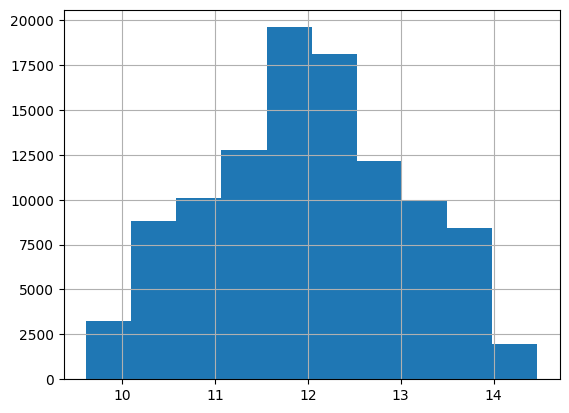

In [58]:
df['temp'].hist()
plt.show() # aunque esto no es estrictamente necesario en el entorno jupyter, sí lo es en otros entornos python, y por eso lo usamos

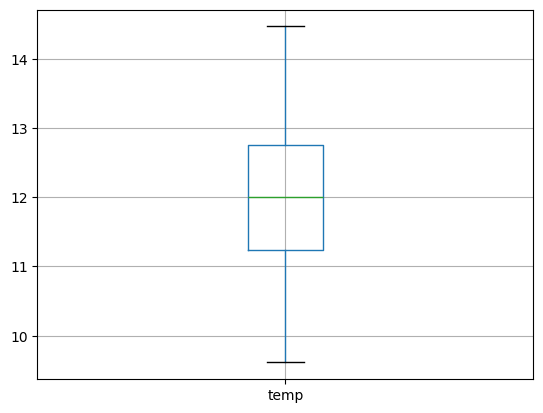

In [59]:
df.boxplot(column='temp')
plt.show() # aunque esto no es estrictamente necesario en el entorno jupyter, sí lo es en otros entornos python, y por eso lo usamos


Fíjate en la diferente formulación de las dos funciones. La función `.hist()` está definida dentro de la biblioteca `pandas`. Al leer el `csv` mediante la función `pd.read_csv()`, sus columnas quedan definidas como series de `pandas`, y, por eso, podemos aplicar la funcion `.hist()`directamente a `temp`, una columna del dataframe `df`. Esta biblioteca, en cambio, no define el objeto `.boxplot()`; al no ser una propiedad del objeto `pandas`, no podemos usarlo de esa forma.  En cambio, `.boxplot()` sí está definido para las columnas de un dataframe, por lo que podemos aplicarlo indicando que queremos el boxplot de una columna del mismo.

Alternativamente, podemos utilizar la biblioteca `seaborn` para crear tanto el histograma como el diagrama de caja, y la propia biblioteca se ocupa de manejar internamente todos estos aspectos. Veamos cómo.

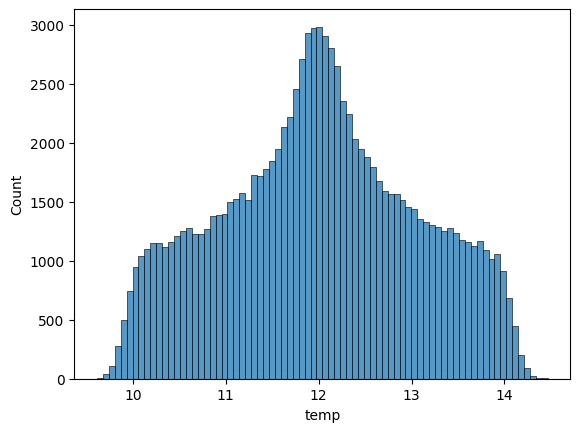

In [62]:
sns.histplot(data=df, x='temp')
plt.show()  # aunque esto no es estrictamente necesario en el entorno jupyter, sí lo es en otros entornos python, y por eso lo usamos


Podemos reducir el número de barras con la opción `bins=`:

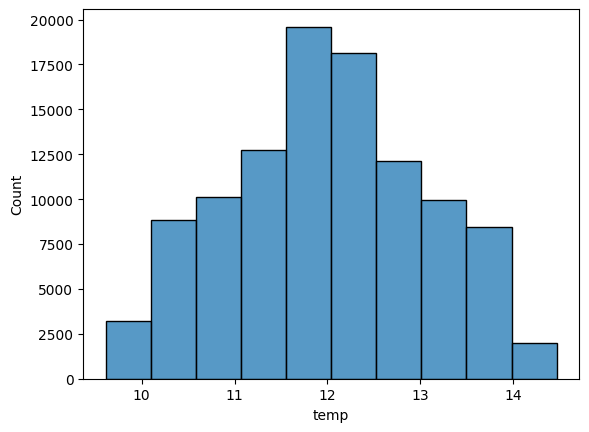

In [63]:
sns.histplot(data=df, x='temp', bins=10)
plt.show() # aunque esto no es estrictamente necesario en el entorno jupyter, sí lo es en otros entornos python, y por eso lo usamos

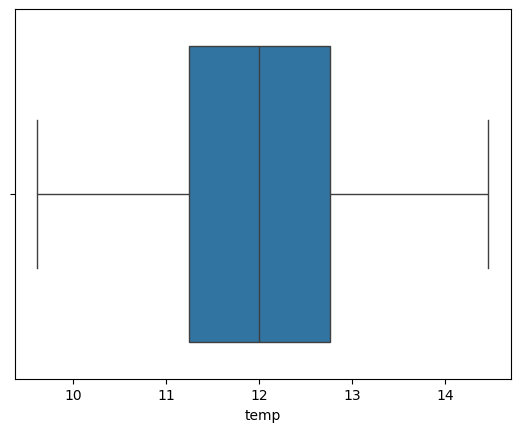

In [64]:
sns.boxplot(data=df, x='temp')
plt.show()  # aunque esto no es estrictamente necesario en el entorno jupyter, sí lo es en otros entornos python, y por eso lo usamos

Volvamos a nuestros datos; en el resto del análisis, usaremos las funciones de `seaborn`.


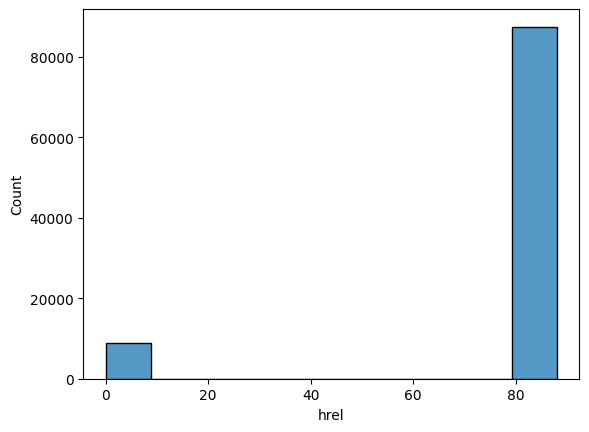

In [65]:
sns.histplot(data=df, x='hrel', bins=10)
plt.show()

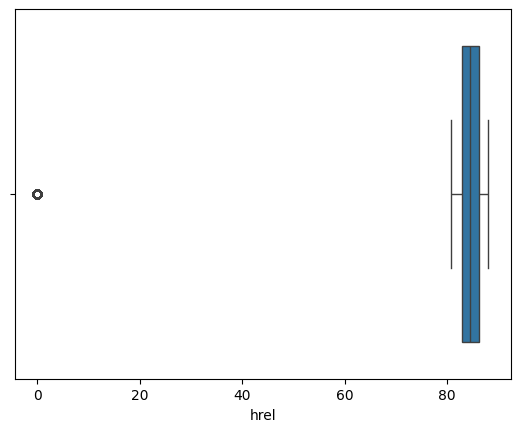

In [66]:
sns.boxplot(data=df, x='hrel')
plt.show()

La distribución de los valores de temperatura es más o menos simétrica, pero la humedad relativa tiene muchos valores cero y eso hace que no podamos estimar bien su distribución.

Tenemos que decir a `python` que no considere estos valores, que son valores *no disponibles*, y no los incluya en el análisis. Luego buscaremos las causas.

La forma de hacerlo es declarar los valores cero como `nan`, es decir *not available number*. Guardamos los datos modificados en una nueva columna, `hrel_mod`:

In [67]:
# vamos a convertir los valores cero de HR% a NAN para que el gráfico no los tenga en cuenta
df['hrel_mod'] = df['hrel']
df.loc[df['hrel_mod'] == 0, 'hrel_mod'] = np.nan

Repetimos ahora el histograma, usando los datos modificados:

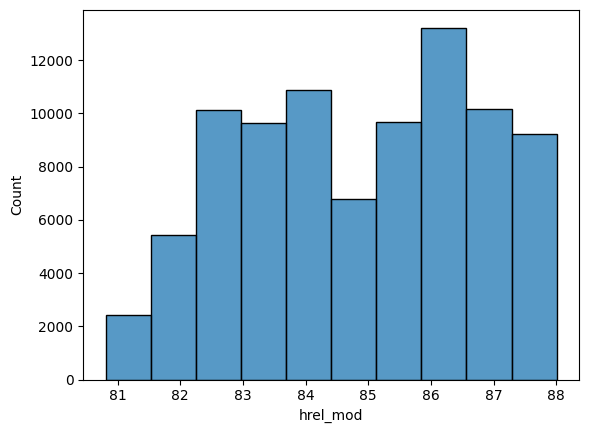

In [68]:
sns.histplot(data=df, x='hrel_mod', bins=10)
plt.show()

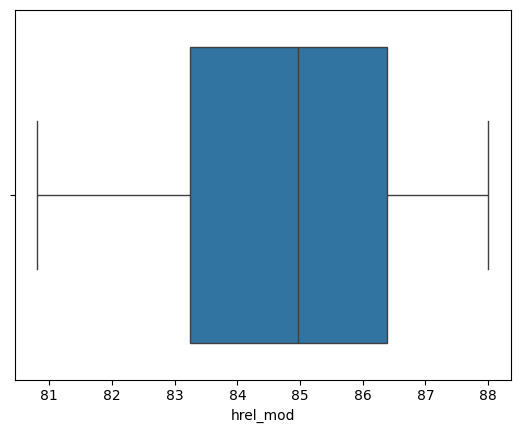

In [69]:
sns.boxplot(data=df, x='hrel_mod')
plt.show()

Una vez que hemos descartado los valores cero, vemos que los valores de humedad relativa están entre 81% y 88%, con dos picos en 84% y 86% aproximadamente. La mediana está en torno a 85%.

A continuación, nos interesa explorar cómo se han producido estos valores durante el año; para eso vamo a hacer un gráfico de los valores a lo largo del tiempo. Usamos la función `.plot()`

Para hacer gráficos temporales, nos interesa convertir la columna `fecha` a un tipo de columna que `python` pueda interpretar como tiempo, y así podremos usar diferentes conversiones ver los datos por días, semanas o meses.

Hemos visto que la columna `fecha`es del tipo `object`. La librería `pandas` utiliza este descriptor de tipo para las columnas que no son tipo numérico, es decir:
*  Cadenas de texto (strings)
* Fechas (si no se han convertido explícitamente a )
* Listas, diccionarios u otros objetos Python
* Datos mixtos (por ejemplo, algunos valores son texto y otros son números

Pandas usa `object` como tipo genérico cuando no puede asignar un tipo más específico como `int`, `float`, `bool` o `datetime`. Es el equivalente a decir: “esto es un objeto de Python, pero no sé exactamente cuál”.

A continuación, convertimos la columna en formato  de fecha (DateTime), y creamos un índice que designamos como `index` del dataframe. Esto nos permitirá algunas agrupaciones muy flexibles. También ordenamos el dataframe usando los valores de este índice.

In [71]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha_ndx']= pd.DatetimeIndex(df.fecha)
df.set_index('fecha_ndx',inplace=True)
df.sort_index(inplace=True)

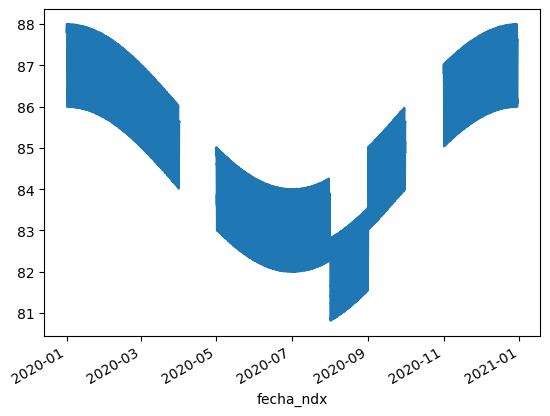

In [75]:
df['hrel_mod'].plot()
plt.show()

La cantidad tan alta de valores hace que el gráfico aparezca como una banda ancha cuando realmente está formado por una línea que oscila entre los valores más altos y más bajos. Para visualizar mejor, podemos usar las series de `pandas` para hacer un gráfico de la media semanal:

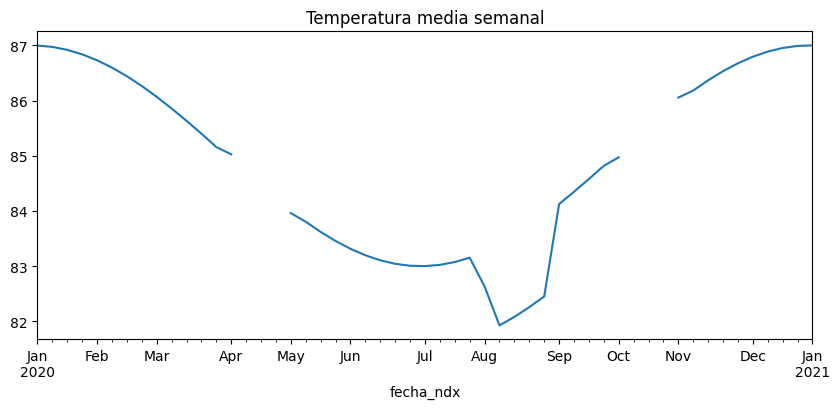

In [77]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
ts = pd.Series(df["hrel_mod"].dropna())
ts.resample('W-MON').mean().plot(title="Humedad relativa media semanal");

A continuación, diversos gráficos de líneas y boxplot agrupados por meses:

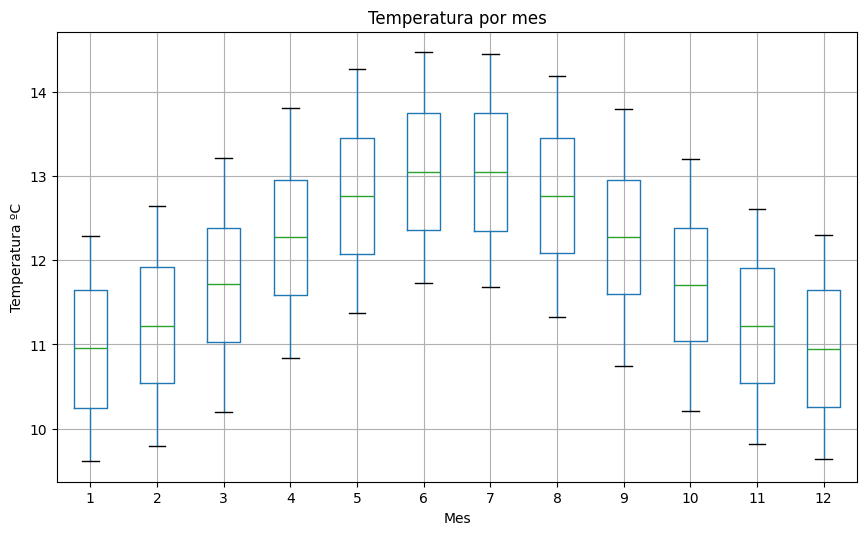

In [ ]:
# nos aseguramos de que el índice sea tipo datetime
df.index = pd.to_datetime(df.index)

# Crear una nueva columna 'mes' a partir del índice
df['mes'] = df.index.month

# Crear el boxplot agrupado por mes usando la biblioteca matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='temp', by='mes', ax=ax)

# Etiquetas y título
ax.set_xlabel("Mes")
ax.set_ylabel("Temperatura ºC")
ax.set_title("Temperatura por mes")
plt.suptitle("")  # Elimina el título automático de pandas

plt.show()


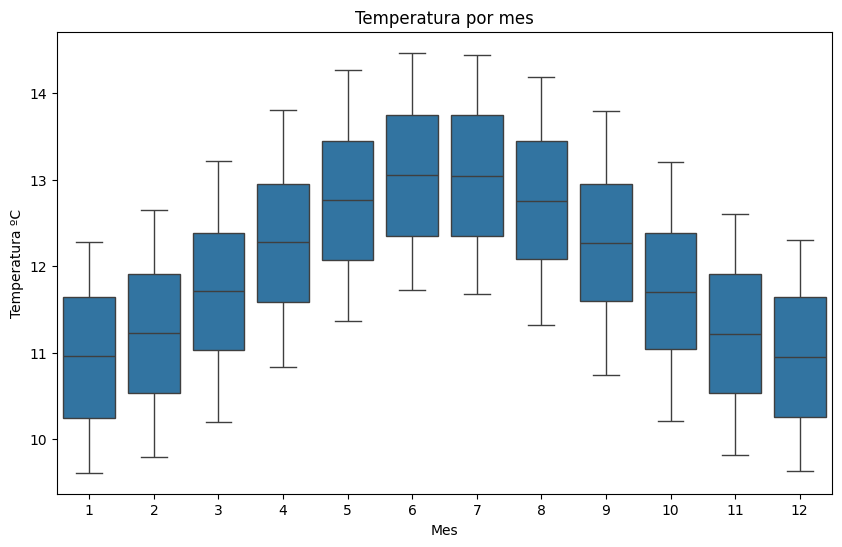

In [ ]:
# el mismo gráfico usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='mes', y='temp', data=df)

# Etiquetas
plt.xlabel("Mes")
plt.ylabel("Temperatura ºC")
plt.title("Temperatura por mes")

plt.show()


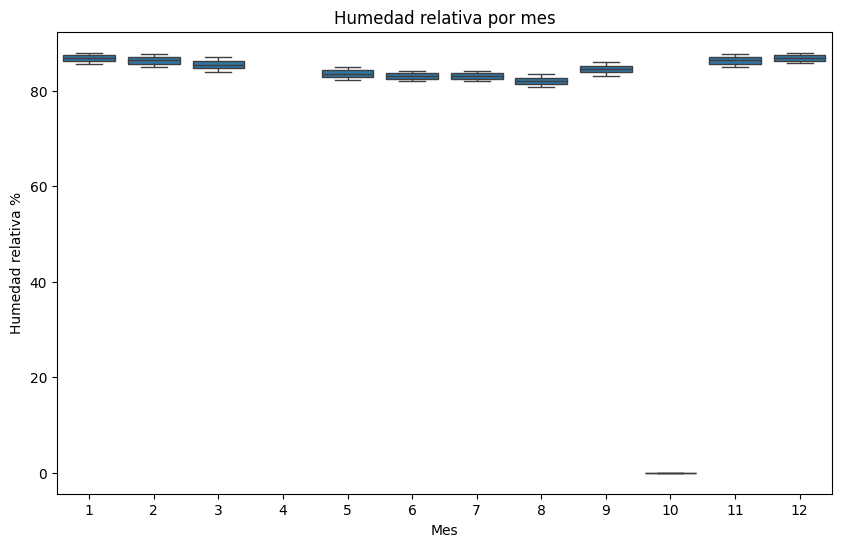

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mes', y='hrel', data=df.reset_index()) # necesario reset_index() para asegurar que el indice se convierte a valor numérico para seaborn y asi ignorar duplicados

# Etiquetas
plt.xlabel("Mes")
plt.ylabel("Humedad relativa %")
plt.title("Humedad relativa por mes")

plt.show()

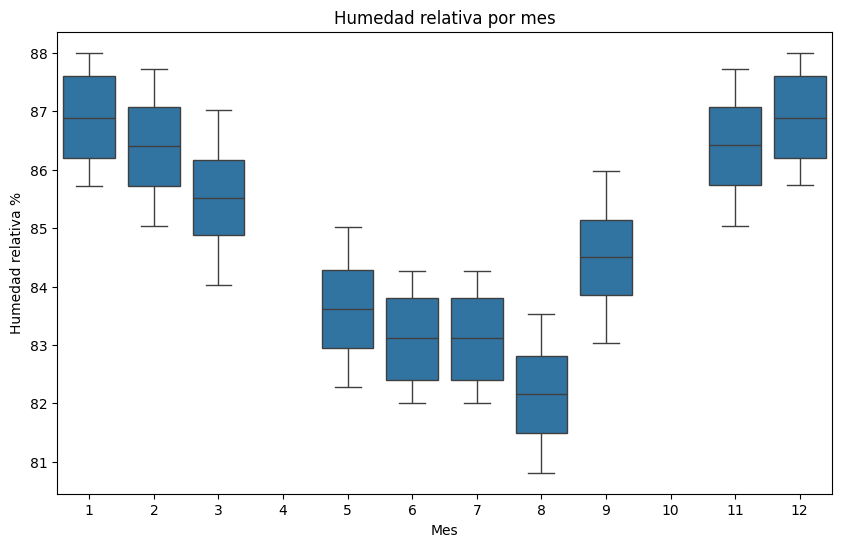

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mes', y='hrel_mod', data=df.reset_index())

# Etiquetas
plt.xlabel("Mes")
plt.ylabel("Humedad relativa %")
plt.title("Humedad relativa por mes")

plt.show()

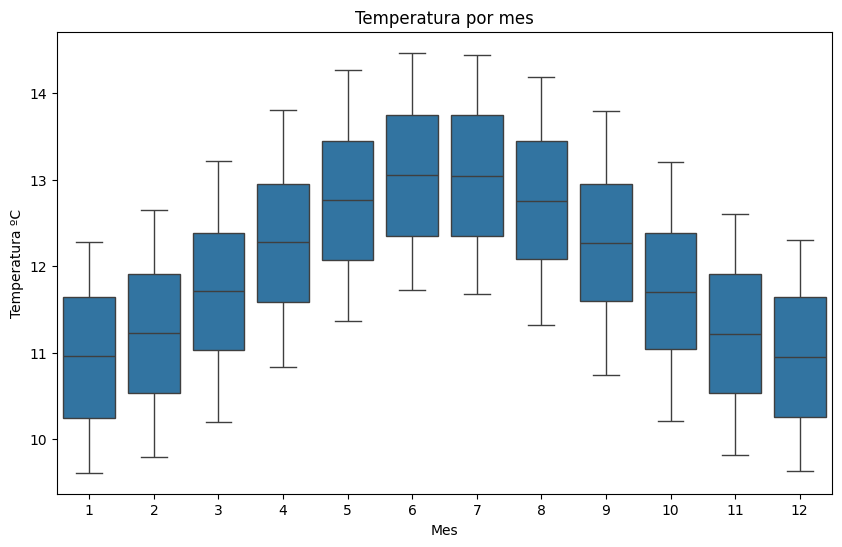

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mes', y='temp', data=df.reset_index())

# Etiquetas
plt.xlabel("Mes")
plt.ylabel("Temperatura ºC")
plt.title("Temperatura por mes")

plt.show()

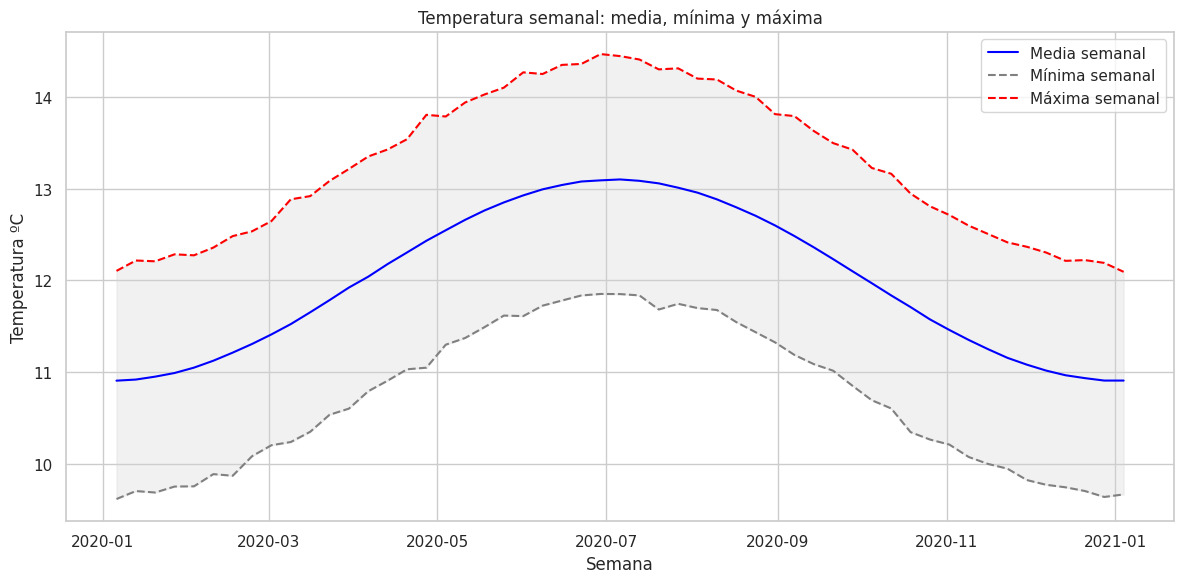

In [80]:
# gráfica de valores medios semanales en matplotlib
# Agrupar por semana y calcular estadísticas
df_semanal = df.resample('W-MON').agg({
    'temp': ['mean', 'min', 'max']
})

# Renombrar columnas
df_semanal.columns = ['media', 'minima', 'maxima']

plt.figure(figsize=(12, 6))

# Línea de temperatura media
plt.plot(df_semanal.index, df_semanal['media'], label='Media semanal', color='blue')

# Líneas de mínima y máxima
plt.plot(df_semanal.index, df_semanal['minima'], label='Mínima semanal', color='gray', linestyle='--')
plt.plot(df_semanal.index, df_semanal['maxima'], label='Máxima semanal', color='red', linestyle='--')

# Relleno entre mínima y máxima (opcional)
plt.fill_between(df_semanal.index, df_semanal['minima'], df_semanal['maxima'], color='lightgray', alpha=0.3)

# Etiquetas
plt.xlabel("Semana")
plt.ylabel("Temperatura ºC")
plt.title("Temperatura semanal: media, mínima y máxima")
plt.legend()
plt.tight_layout()
plt.show()


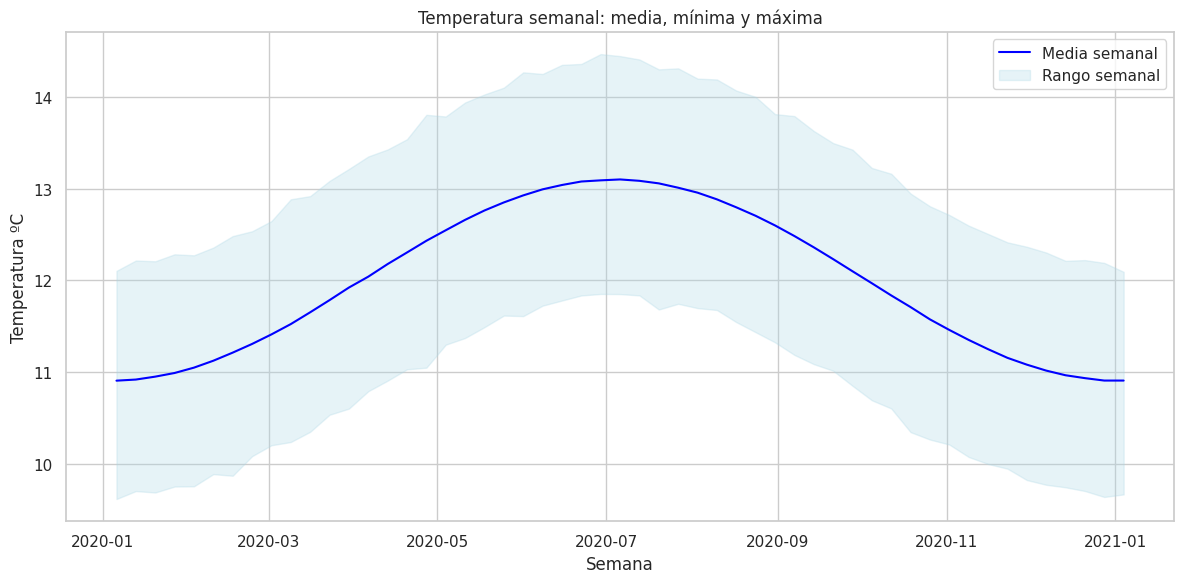

In [79]:
# Gráfica de valores medios semanales en seaborn
# Agrupar por semana y calcular estadísticas
df_semanal = df.resample('W-MON').agg({
    'temp': ['mean', 'min', 'max']
})
df_semanal.columns = ['media', 'minima', 'maxima']

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Línea de temperatura media
sns.lineplot(x=df_semanal.index, y=df_semanal['media'], label='Media semanal', color='blue')

# Relleno entre mínima y máxima
plt.fill_between(df_semanal.index, df_semanal['minima'], df_semanal['maxima'],
                 color='lightblue', alpha=0.3, label='Rango semanal')

# Etiquetas
plt.xlabel("Semana")
plt.ylabel("Temperatura ºC")
plt.title("Temperatura semanal: media, mínima y máxima")
plt.legend()
plt.tight_layout()
plt.show()
